## Iris dataset: exploratory data analysis

<b>Dataset Information:</b>
<p>A widely used dataset in pattern classification. It contains 3 classes of plant species with 50 instances of each. <b>One class is linearly separable</b>, but the others are not.</p>

In [20]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# set to default, more asthetically appealing plots
pd.options.display.mpl_style = 'default'

In [21]:
# read in iris data set 
iris_data_path = "iris.data.txt"
iris = pd.read_csv(iris_data_path)

# change columns to feature names
feature_cols = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'species']
iris.columns = feature_cols

In [22]:
# snapshot of data
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Notes: sepal length and width is > petal length and width for iris-setosa. Does this hold for other species too?

In [24]:
# quick look at the summary number values
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Notes: it appears on average the sepal length is almost 2 cm > than petal length (same goes for width as well)

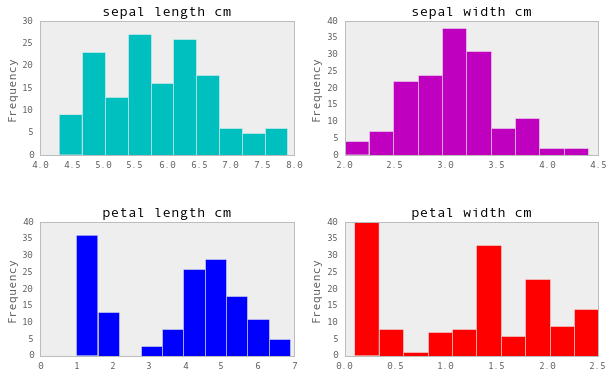

In [41]:
# let's look at histogram distributions
fig, axes = plt.subplots(2,2, figsize=(10,6))
iris.sepal_length_cm.plot.hist(ax=axes[0,0],color='c',grid=False)
axes[0,0].set_title('sepal length cm')
iris.sepal_width_cm.plot.hist(ax=axes[0,1], color='m',grid=False)
axes[0,1].set_title('sepal width cm')
iris.petal_length_cm.plot.hist(ax=axes[1,0],color='b',grid=False)
axes[1,0].set_title('petal length cm')
iris.petal_width_cm.plot.hist(ax=axes[1,1],color='r',grid=False)
axes[1,1].set_title('petal width cm')

Notes: first observation seems to show that the sepal length and width are somewhat normally distributed. The left tail is longer on both the sepal length and width. The petal length however is not normally distributed. 

...on second glance the sepal length also may not be normally distributed either. 